This is standard output from Rajeev_download_process_files.py
Data already downloaded.
Data already extracted.
Processing.
Tail of dataframe 'yob':

Tail of dataframe 'names':

Tail of dataframe 'years':
Tail of dataframe 'yob1900':
Tail of dataframe 'names1900':
Tail of dataframe 'years1900':
--------------------
First 80 characters of list:
["Homer", "Marge", "Bart", "Lisa", "Maggie", "Akira", "Albright", "Aristotle", " ...
all_listed: list of length 143
--------------------
Dataframe names filtered to those that match list
106695 records to begin.
214 records remaining.
            name sex  year_count  year_min  year_max     pct_sum   pct_max
66529       John   M         137      1880      2016  560.205488  8.738268
21          Mary   F         137      1880      2016  474.088924  7.764419
66624     Robert   M         137      1880      2016  399.245833  5.821043
66456    Charles   M         137      1880      2016  266.892668  4.840213
66776    Richard   M         137      1880   

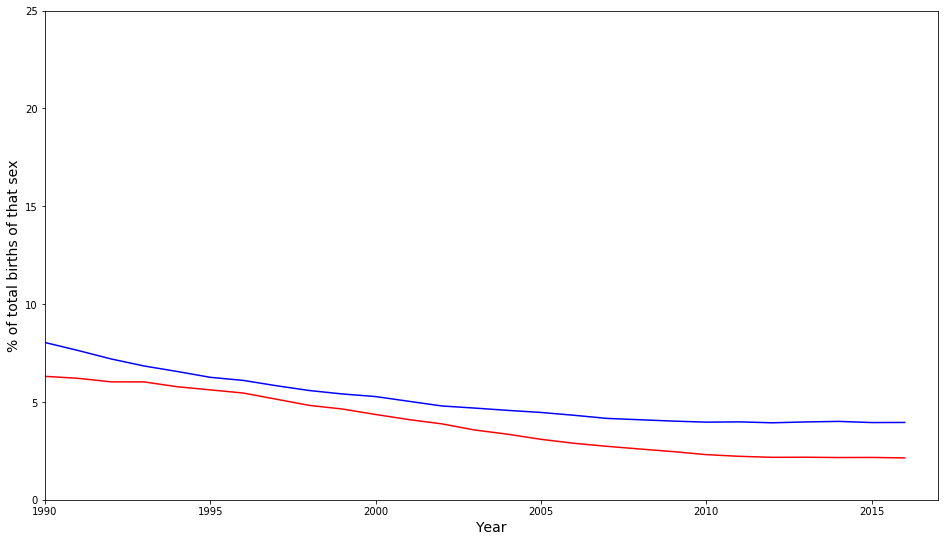

C:\Users\Shreya\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Tail of dataframe:
          name sex  births  year       pct  ranked  temp
1878321    Roy   M     536  2016  0.028500   539.0     1
1878895   Nick   M     175  2016  0.009305  1110.0     1
1879130   Hans   M     131  2016  0.006966  1349.0     1
1879754  Loren   M      73  2016  0.003882  1973.5     1
1881989  Homer   M      24  2016  0.001276  4233.5     1
Tail of dataframe:
          name sex  births  year       pct  ranked  temp
1860131  Agnes   F     229  2016  0.013036  1107.5     1
1860767   Mona   F     119  2016  0.006774  1739.5     1
1860784  Doris   F     117  2016  0.006660  1761.5     1
1861359   Edna   F      80  2016  0.004554  2335.0     1
1868091   John   F      12  2016  0.000683  9086.0     1


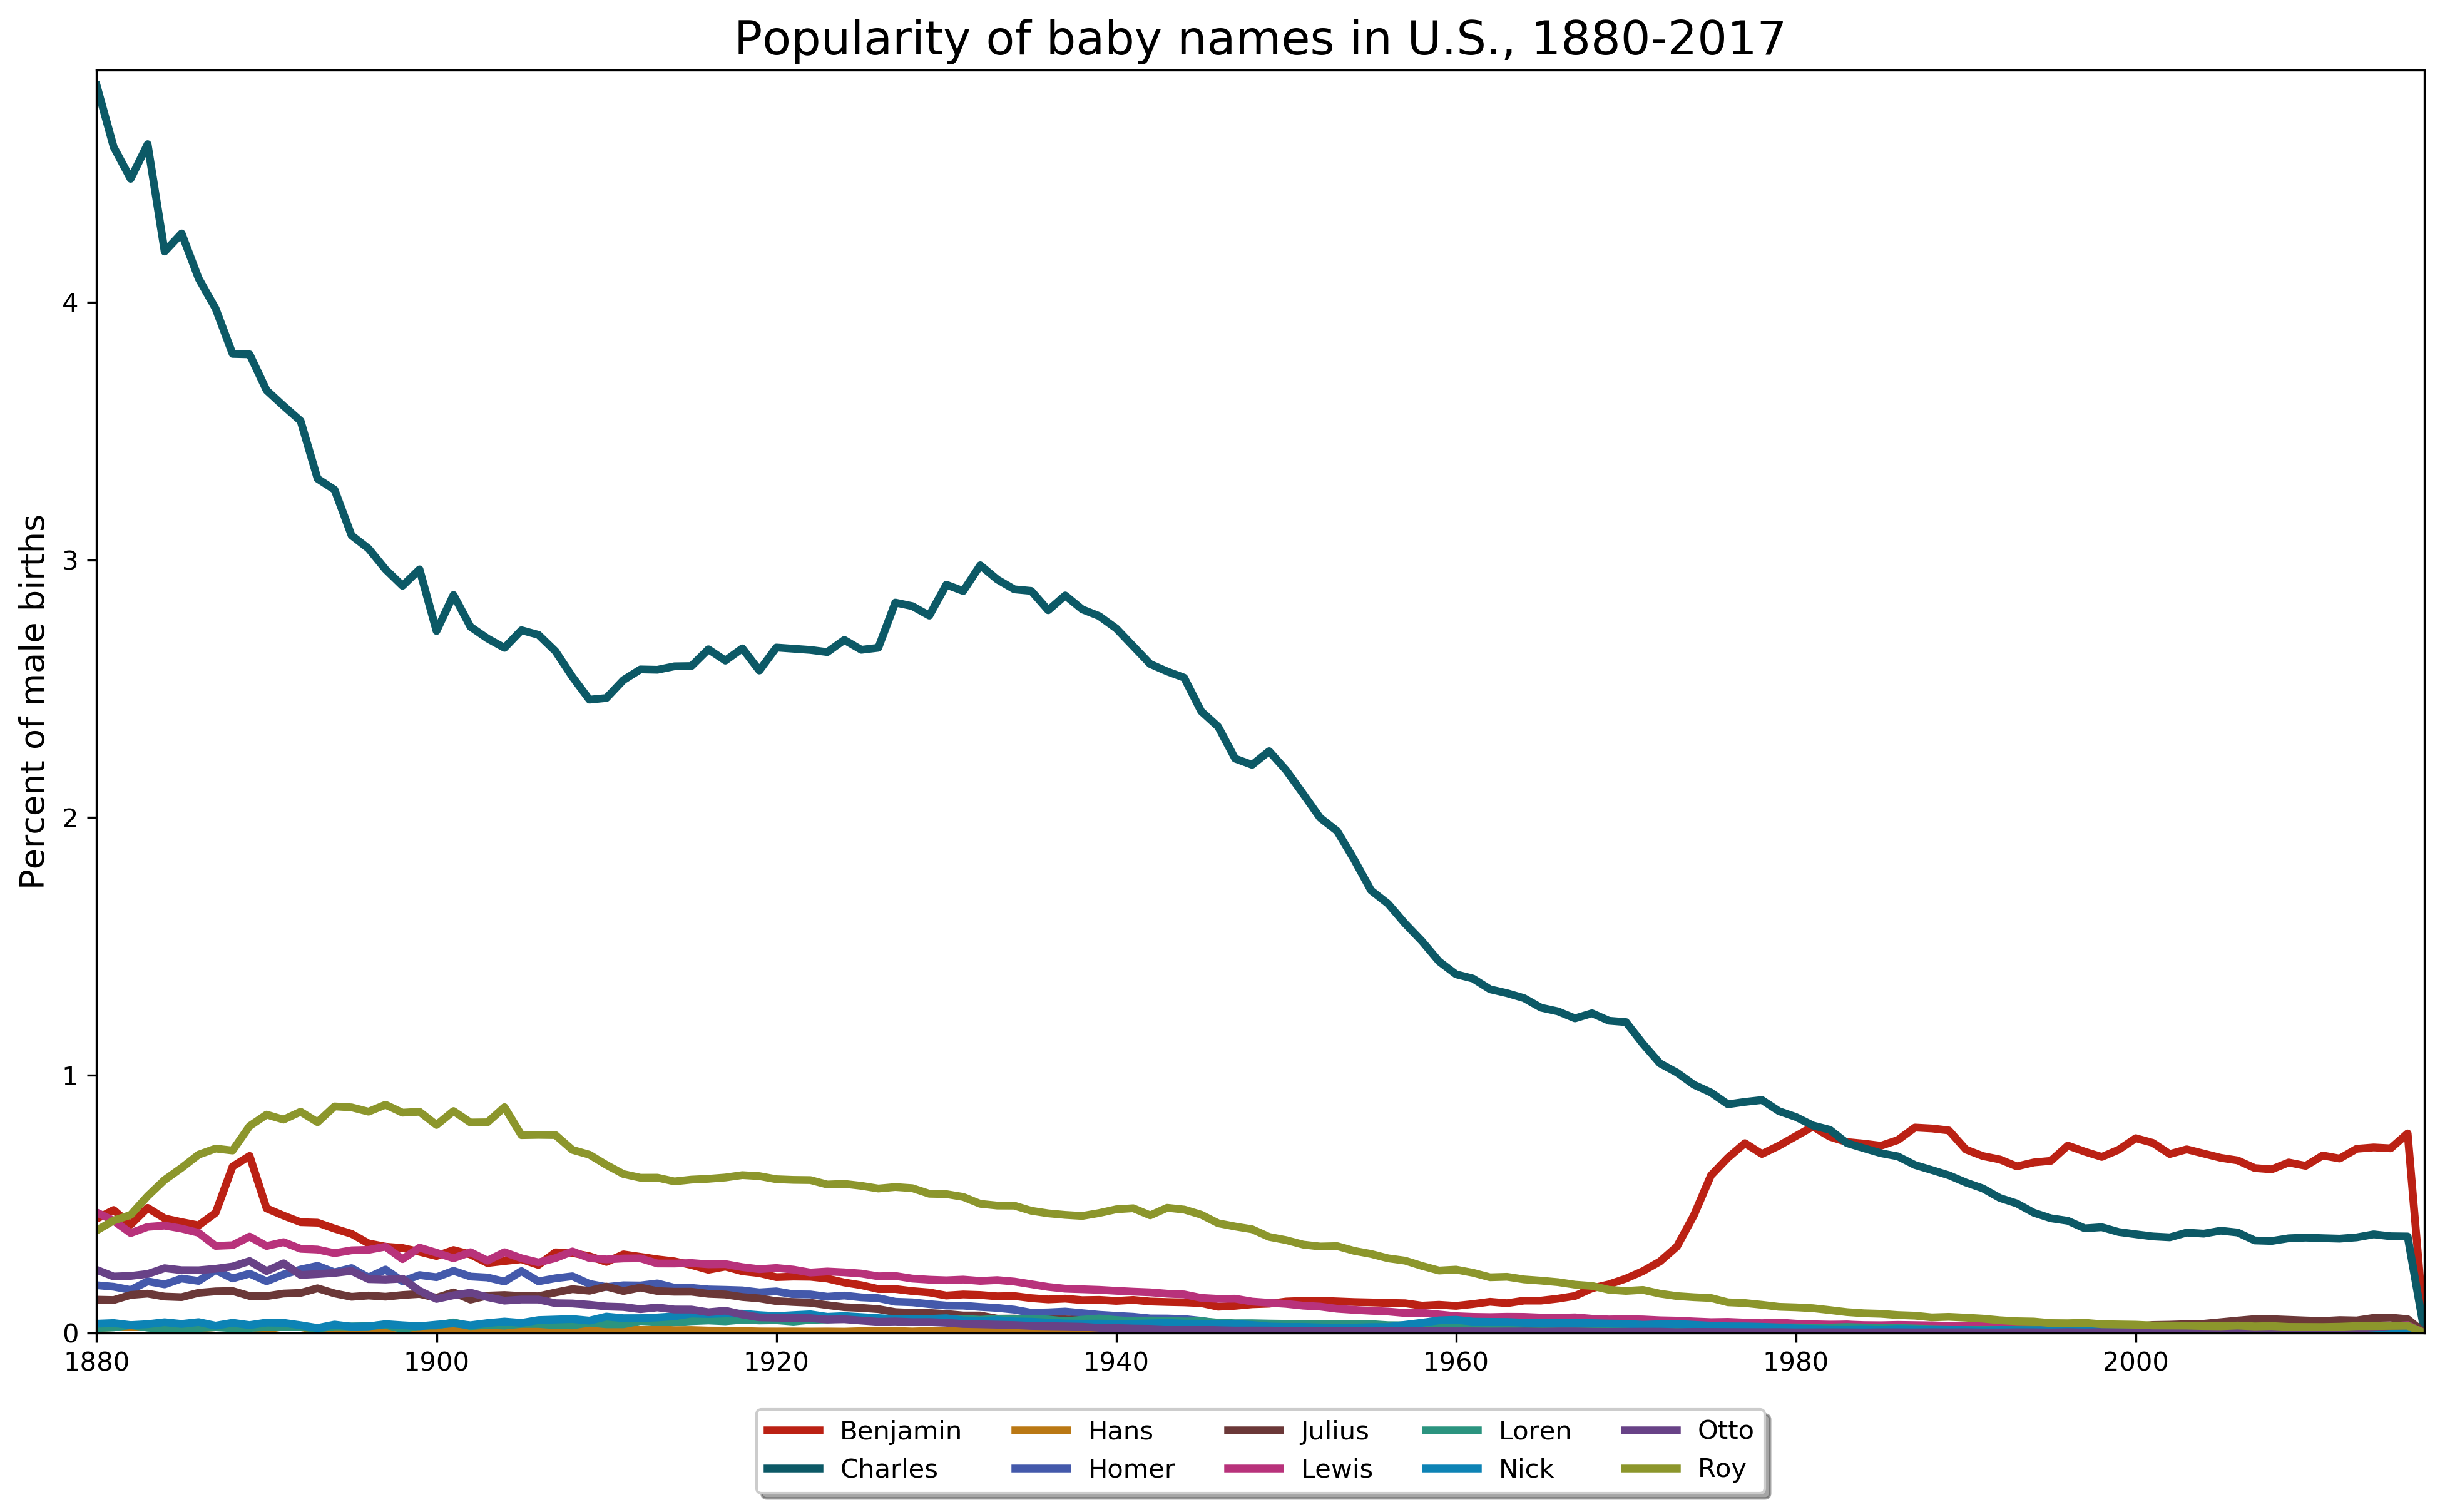

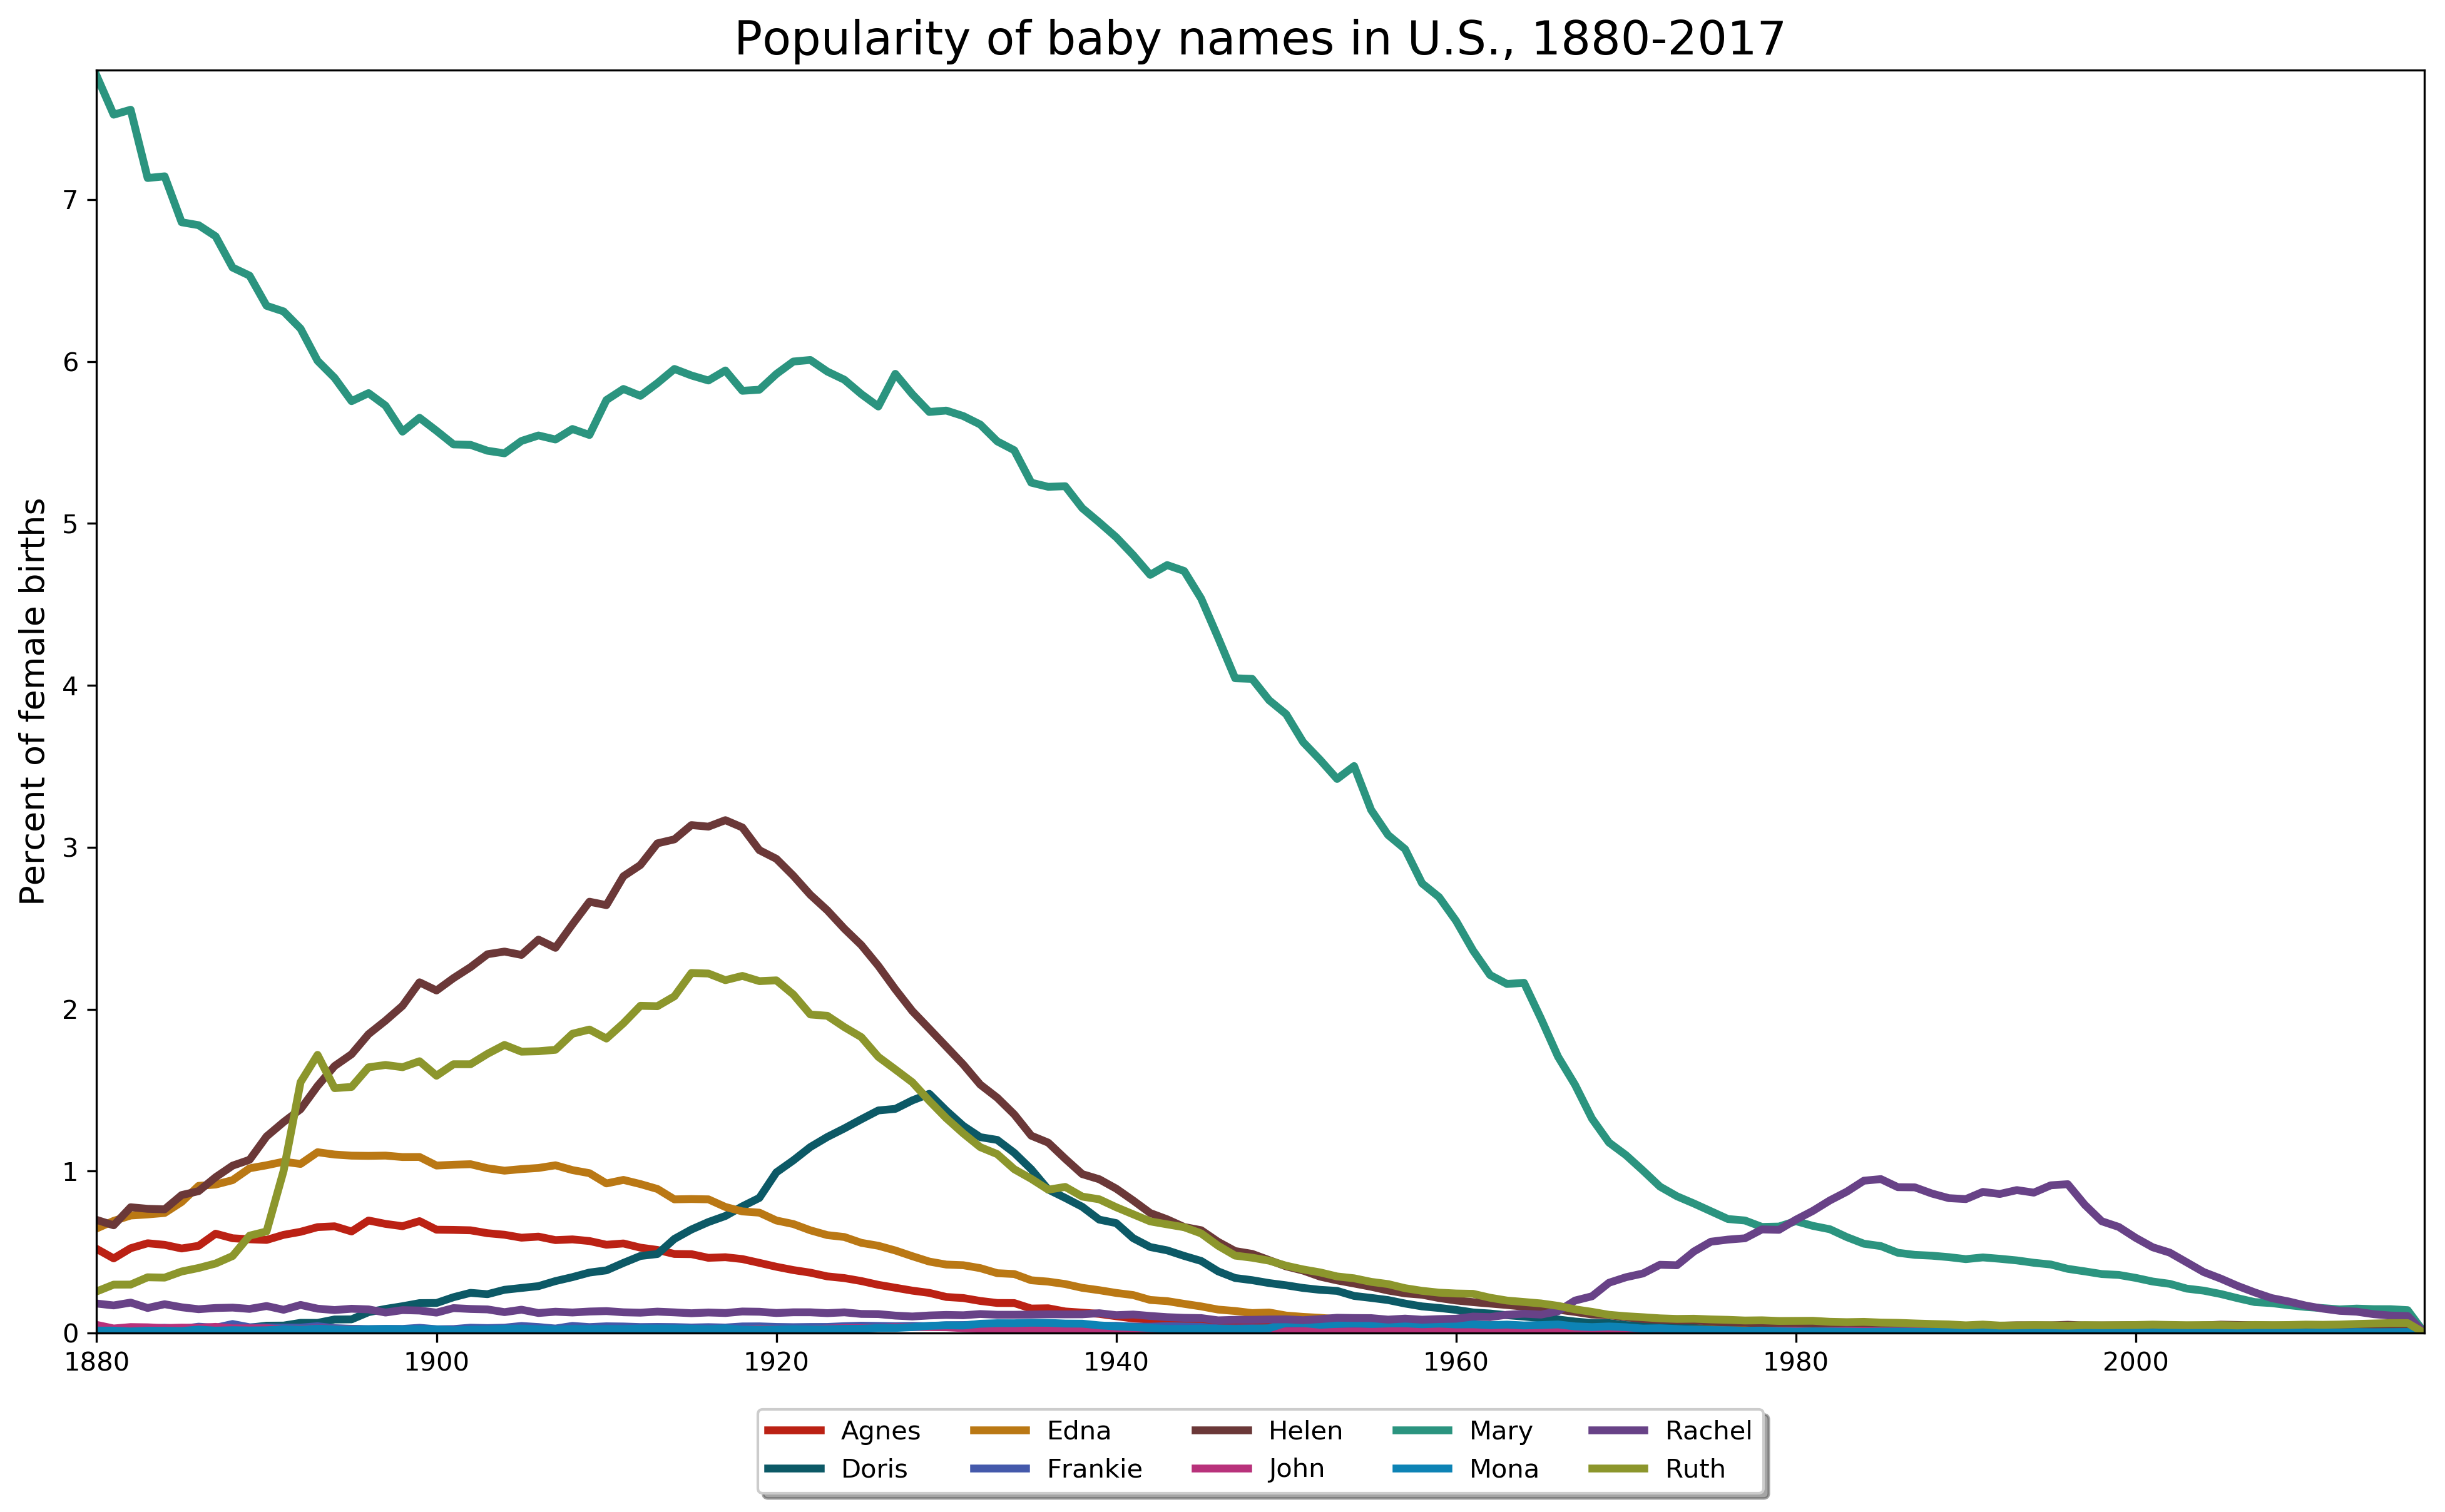

,name,sex,year_count,year_min,year_max,pct_sum,pct_max
0,John,M,137,1880,2016,560.205488,8.738268
1,Mary,F,137,1880,2016,474.088924,7.764419
2,Robert,M,137,1880,2016,399.245833,5.821043
3,Charles,M,137,1880,2016,266.892668,4.840213
4,Richard,M,137,1880,2016,190.069663,3.624920


In [2]:
listed_path = "rajeev_data\simpsons_characters\simpsons_character.list"
totals_title = ""
top_cutoff = 10

top_boys_title = ""
top_girls_title = ""
last_year = 2017 #change this when Social Security database is updated
save_path = "rajeev_plots" # files created by this notebook will be saved in this directory

import time
import os
if not os.path.isdir(save_path): # creates path if it does not exist
    os.makedirs(save_path)
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn 
print('This is standard output from Rajeev_download_process_files.py')
%run Rajeev_download_process_files.py

print('--------------------\nFirst 80 characters of list:')
listed_file = open(listed_path, "r").read()
print(listed_file[:80] + ' ...')
all_listed = eval(listed_file) # make sure you trust this file!
all_listed_set = set(all_listed) # to remove duplicates
all_listed = list(all_listed)
print("all_listed: list of length", len(all_listed))

# reduce names dataframe to those matching list
print('--------------------\nDataframe names filtered to those that match list')
print("%d records to begin." % (len(names)))
names_listed = names[names.name.isin(all_listed)].copy()
names_listed.sort_values('pct_max', ascending=False, inplace=True)
print("%d records remaining." % (len(names_listed)))
listed_in_df = list(names_listed.name)
print(names_listed.head(10))
listed_m = list(names[(names.sex == 'M') & (names.name.isin(listed_in_df))]['name'])
listed_f = list(names[(names.sex == 'F') & (names.name.isin(listed_in_df))]['name'])

#reduce yob dataframe to those matching list
print('--------------------\nDataframe yob filtered to those that match list (count only)')
print("%d records to begin." % (len(yob)))
yob_listed = yob[yob.name.isin(listed_in_df)].copy()
yob_listed.sort_values(['year', 'sex', 'name'], ascending=False, inplace=True)
print("%d records remaining." % (len(yob_listed)))

# m and f totals
yob_listed_f_agg = pd.DataFrame(yob_listed[yob_listed.sex == 'F'].groupby('year').sum())[['births', 'pct']]
yob_listed_m_agg = pd.DataFrame(yob_listed[yob_listed.sex == 'M'].groupby('year').sum())[['births', 'pct']]
print('--------------------\nHead of total matching list per year, female')
print(yob_listed_f_agg.head())

# print chart of m and f totals
print('\n')

# function to determine a nice y-axis limit a little above the maximum value
# rounds maximum y up to second-most-significant digit
def determine_y_limit(x):                      
    significance = int(math.floor((math.log10(x))))
    val = math.floor(x / (10 ** (significance - 1))) + 1
    val = val * (10 ** (significance - 1))
    return val

#data
xf = list(yob_listed_f_agg.index)
xm = list(yob_listed_m_agg.index)

plt.figure(figsize=(16,9))
plt.plot(xf, list(yob_listed_f_agg.pct), color="red")
plt.plot(xm, list(yob_listed_m_agg.pct), color="blue")

plt.ylim(0, determine_y_limit(max(list(yob_listed_f_agg.pct)
                                  +list(yob_listed_m_agg.pct))))
plt.xlim(1990, 2017)

plt.title(totals_title, fontsize = 20)
plt.xlabel("Year", fontsize = 14)
plt.ylabel("% of total births of that sex", fontsize = 14)

plt.show()

#function to make dataframe for top names

def top_df(yobdf, names, sexes):
    """ yobdf = dataframe derived from yob; normally it would just be yob itself.
        names = list of names
        sexes = list of length 1 for all the same sex, or same length as names. 'F' and 'M' allowed
        """

    df_chart = yobdf.copy()
    assert len(sexes) == 1 or len(names) == len(sexes)
    if len(sexes) == 1:
        sexes = sexes * len(names)

    df_chart = df_chart[df_chart['name'].isin(names)]   

    df_chart['temp'] = 0
    for row in range(len(df_chart)):
        for pos in range(len(names)):
            if df_chart.name.iloc[row] == names[pos] and df_chart.sex.iloc[row] == sexes[pos]:
                df_chart.temp.iloc[row] = 1
    df_chart = df_chart[df_chart.temp == 1]

    print("Tail of dataframe:")
    print(df_chart.tail())

    output_df = pd.DataFrame(pd.pivot_table(df_chart, values='pct', index = 'year', columns=['name', 'sex']))

    col = output_df.columns[0]

    for yr in range(1990, last_year + 1): #inserts missing years
        if yr not in output_df.index:
            #output_df[col][yr] = 0.0
            output_df = output_df.append(pd.DataFrame(index=[yr], columns=[col], data=[0.0]))

    output_df = output_df.fillna(0)
    
    return output_df

listed_top_m = top_df(yob, listed_m[:top_cutoff], ['M'])
listed_top_f = top_df(yob, listed_f[:top_cutoff], ['F'])

#a single function to make the four different kinds of charts

def make_chart(df, form='line', title='', colors= [], smoothing=0, \
               groupedlist = [], baseline='sym', png_name=''):
    
    dataframe = df.copy()
    
    startyear = min(list(dataframe.index))
    endyear = max(list(dataframe.index))
    yearstr = '%d-%d' % (startyear, endyear)
    
    legend_size = 0.01
    
    has_male = False
    has_female = False
    has_both = False
    max_y = 0
    for name, sex in dataframe.columns:
        max_y = max(max_y, dataframe[(name, sex)].max())
        final_name = name
        if sex == 'M': has_male = True
        if sex == 'F': has_female = True
        if smoothing > 0:
            newvalues = []
            for row in range(len(dataframe)):
                start = max(0, row - smoothing)
                end = min(len(dataframe) - 1, row + smoothing)
                newvalues.append(dataframe[(name, sex)].iloc[start:end].mean())
            for row in range(len(dataframe)):
                dataframe[(name, sex)].iloc[row] = newvalues[row]
    if has_male and has_female:
        y_text = "% of births of indicated sex"
        has_both = True
    elif has_male:
        y_text = "Percent of male births"
    else:
        y_text = "Percent of female births"
    
    num_series = len(dataframe.columns)
    
    if colors == []:
        colors = ['#BB2114', '#0C5966', '#BA7814', '#4459AB', '#6B3838', 
                  '#B8327B', '#2B947F', '#0D83B5', '#684287', '#8C962C', 
                  '#92289E', '#242D7D']
        # my own list of dark contrasting colors
    num_colors = len(colors)
    
    if num_series > num_colors:
        print("Warning: colors will be repeated.")
    
    if title == '':
        if num_series == 1:
            title = "Popularity of baby name %s in U.S., %s" % (final_name, yearstr)
        else:
            title = "Popularity of baby names in U.S., %s" % (yearstr)
    
    x_values = range(startyear, endyear + 1)
    y_zeroes = [0] * (endyear - startyear)
    
    if form == 'line':
        fig, ax = plt.subplots(num=None, figsize=(16, 9), dpi=300, facecolor='w', edgecolor='w')
        counter = 0
        for name, sex in dataframe.columns:
            color = colors[counter % num_colors]
            counter += 1
            if has_both:
                label = "%s (%s)" % (name, sex)
            else:
                label = name
            ax.plot(x_values, dataframe[(name, sex)], label=label, color=color, linewidth = 3)
        ax.set_ylim(0,determine_y_limit(max_y)) 
        ax.set_xlim(startyear, endyear)
        ax.set_ylabel(y_text, size = 13)
        ax.set_title(title, size = 18)
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * legend_size,
                 box.width, box.height * (1 - legend_size)])
        legend_cols = min(5, num_series)
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=legend_cols)

    if form == 'subplots_auto':
        counter = 0
        fig, axes = plt.subplots(num_series, 1, figsize=(12, 3.5*num_series))
        print('Maximum alpha: %d percent' % (determine_y_limit(max_y)))
        for name, sex in dataframe.columns:
            if sex=='M':
                sex_label = 'male'
            else:
                sex_label = 'female'
            label = "Percent of %s births for %s" % (sex_label, name)
            current_ymax = dataframe[(name, sex)].max()
            tint = 1.0 * current_ymax / determine_y_limit(max_y)
            axes[counter].plot(x_values, dataframe[(name, sex)], color='k')
            axes[counter].set_ylim(0,determine_y_limit(current_ymax))
            axes[counter].set_xlim(startyear, endyear)
            axes[counter].fill_between(x_values, dataframe[(name, sex)], color=colors[0], alpha=tint, interpolate=True)

            axes[counter].set_ylabel(label, size=11)
            plt.subplots_adjust(hspace=0.1)
            counter += 1
            
    if form == 'subplots_same':
        counter = 0
        fig, axes = plt.subplots(num_series, 1, figsize=(12, 3.5*num_series))
        print('Maximum y axis: %d percent' % (determine_y_limit(max_y)))
        for name, sex in dataframe.columns:
            if sex=='M':
                sex_label = 'male'
            else:
                sex_label = 'female'
            label = "Percent of %s births for %s" % (sex_label, name)
            axes[counter].plot(x_values, dataframe[(name, sex)], color='k')
            axes[counter].set_ylim(0,determine_y_limit(max_y))
            axes[counter].set_xlim(startyear, endyear)
            axes[counter].fill_between(x_values, dataframe[(name, sex)], color=colors[1], alpha=1, interpolate=True)
            axes[counter].set_ylabel(label, size=11)
            plt.subplots_adjust(hspace=0.1)
            counter += 1
        
    if form == 'stream':
        plt.figure(num=None, figsize=(20,10), dpi=150, facecolor='w', edgecolor='k')
        plt.title(title, size=17)        
        plt.xlim(startyear, endyear)
        
        if has_both:
            yaxtext = 'Percent of births of indicated sex (scale: '
        elif has_male:
            yaxtext = 'Percent of male births (scale: '
        else:
            yaxtext = 'Percent of female births (scale: '
        
        scale = str(determine_y_limit(max_y)) + ')'
        yaxtext += scale
        plt.ylabel(yaxtext, size=13)
        polys = plt.stackplot(x_values, *[dataframe[(name, sex)] for name, sex in dataframe.columns], 
                                 colors=colors, baseline=baseline)
        legendProxies = []
        for poly in polys:
            legendProxies.append(plt.Rectangle((0, 0), 1, 1, fc=poly.get_facecolor()[0]))
        namelist = []
        for name, sex in dataframe.columns:
            if has_both:
                namelist.append('%s (%s)' % (name, sex))
            else:
                namelist.append(name)
        plt.legend(legendProxies, namelist, loc=3, ncol=2)
        
        plt.tick_params(\
            axis='y',          
            which='both',      #  major and minor ticks 
            left='off',      
            right='off',       
            labelleft='off')
        
    plt.show()   
    if png_name != '':
        filename = save_path + "/" + png_name + ".png"
        plt.savefig(filename)
    plt.close()

# line charts

make_chart(df=listed_top_m,
           form='line', # line , subplots_auto , subplots_same , stream
           title=top_boys_title,
           colors= [],
           smoothing=0,
           baseline='zero',  # zero ,  sym ,  wiggle ,  weighted_wiggle
           )

make_chart(df=listed_top_f,
           form='line', # line , subplots_auto , subplots_same , stream
           title=top_girls_title,
           colors= [],
           smoothing=0,
           baseline='zero',  # zero ,  sym ,  wiggle ,  weighted_wiggle
           )

names_listed.reset_index(drop = True, inplace = True)
names_listed.head()
#names_listed.to_csv("rajeev_data\simpsons_characters\names_matching_list.csv")

In [3]:
print(names_listed.name.unique())

['John' 'Mary' 'Robert' 'Charles' 'Richard' 'Lisa' 'Helen' 'Ruth'
 'Elizabeth' 'Gary' 'Scott' 'Sarah' 'Timothy' 'Alice' 'Willie' 'Doris'
 'Edna' 'Maude' 'Amber' 'Rachel' 'Dewey' 'Gerald' 'Roy' 'Gloria' 'Todd'
 'Ralph' 'Benjamin' 'Roger' 'Carl' 'Charlie' 'Herbert' 'Agnes' 'Maggie'
 'Jacqueline' 'Lindsey' 'Bernice' 'Lewis' 'Allison' 'Troy' 'Terri' 'Johnny'
 'Marvin' 'Herman' 'Tony' 'Chase' 'Martin' 'Bill' 'Eddie' 'Cecil' 'Sherri'
 'Otto' 'Homer' 'Jake' 'Lance' 'Declan' 'Julius' 'Dave' 'Patty' 'Lou'
 'Wendell' 'Kent' 'Kirk' 'Selma' 'Waylon' 'Nelson' 'Ginger' 'Jasper' 'Doug'
 'Luann' 'Marty' 'Nick' 'Seymour' 'Mona' 'Barney' 'Loren' 'Frankie' 'Louie'
 'Desmond' 'Bart' 'Francesca' 'Ned' 'Artie' 'Lionel' 'Hans' 'Raphael' 'Rod'
 'Akira' 'Cletus' 'Murphy' 'Horatio' 'Gino' 'Leopold' 'Moe' 'Jacques'
 'Marge' 'Lenny' 'Dolph' 'Harm' 'Janey' 'Arnie' 'Gil' 'Luigi' 'Sanjay'
 'Kashmir' 'Rainier' 'Aristotle' 'Clancy' 'Jebediah' 'Kwan' 'Kearney'
 'Lurleen' 'Kang' 'Elves' 'Jimbo' 'Mayor']


In [5]:
cutoffn = 0
# how many names will remain to evaluate after duplicates removed

from collections import OrderedDict
evallistm = OrderedDict()
evallistf = OrderedDict()

# remove names with more common duplicates in other sex
# this happens frequently in ssa db

for name in listed_m:
    try:
        pctf = names_listed[(names_listed.sex == 'F') & 
                            (names_listed.name == name)].pct_max.iloc[0]
        pctm = names_listed[(names_listed.sex == 'M') & 
                            (names_listed.name == name)].pct_max.iloc[0]
    except:
        pctf = 98
        pctm = 99
    if (name not in names_listed[names_listed.sex == 'F'].name.unique() or
        pctf < pctm):
        evallistm[name] = ''
        
for name in listed_f:
    try:
        pctf = names_listed[(names_listed.sex == 'F') & 
                            (names_listed.name == name)].pct_max.iloc[0]
        pctm = names_listed[(names_listed.sex == 'M') & 
                            (names_listed.name == name)].pct_max.iloc[0]
    except:
        pctf = 99
        pctm = 98
    if (name not in names_listed[names_listed.sex == 'M'].name.unique() or
        pctm < pctf):
        evallistf[name] = ''
        
if cutoffn > 0:
    assert len(evallistm) > cutoffn
    assert len(evallistf) > cutoffn
    print(evallistm[:cutoffn])
    print(evallistf[:cutoffn])
else:
    print('Length of lists: %d male, %d female\n' % (len(evallistm), len(evallistf)))
    print(evallistm)
    print(' ')
    print(evallistf)

Length of lists: 80 male, 35 female

OrderedDict([('Benjamin', ''), ('Julius', ''), ('Lewis', ''), ('Loren', ''), ('Roy', ''), ('Otto', ''), ('Nick', ''), ('Homer', ''), ('Charles', ''), ('Hans', ''), ('Willie', ''), ('John', ''), ('Gerald', ''), ('Ralph', ''), ('Troy', ''), ('Herman', ''), ('Robert', ''), ('Martin', ''), ('Jasper', ''), ('Nelson', ''), ('Herbert', ''), ('Roger', ''), ('Johnny', ''), ('Jake', ''), ('Tony', ''), ('Cecil', ''), ('Scott', ''), ('Charlie', ''), ('Ned', ''), ('Richard', ''), ('Eddie', ''), ('Carl', ''), ('Bill', ''), ('Marvin', ''), ('Dave', ''), ('Louie', ''), ('Timothy', ''), ('Lionel', ''), ('Wendell', ''), ('Gary', ''), ('Bart', ''), ('Murphy', ''), ('Dewey', ''), ('Raphael', ''), ('Barney', ''), ('Leopold', ''), ('Kirk', ''), ('Cletus', ''), ('Kent', ''), ('Seymour', ''), ('Lance', ''), ('Horatio', ''), ('Todd', ''), ('Luigi', ''), ('Marty', ''), ('Jacques', ''), ('Desmond', ''), ('Gino', ''), ('Arnie', ''), ('Waylon', ''), ('Gil', ''), ('Rod', ''), ('

In [9]:
#manually copy and paste the above lists and assign 
#'acc' or 'rej' individually to accept or reject

evallistm = OrderedDict([('Benjamin', 'acc'), ('Julius', 'acc'), ('Lewis', 'acc'), ('Loren', 'acc'), ('Roy', 'acc'), ('Otto', 'acc'), ('Nick', 'acc'), ('Homer', 'acc'), ('Charles', 'acc'), ('Hans', 'acc'), ('Willie', 'acc'), ('John', 'acc'), ('Gerald', 'acc'), ('Ralph', 'acc'), ('Troy', 'acc'), ('Herman', 'acc'), ('Robert', 'acc'), ('Martin', 'acc'), ('Jasper', 'acc'), ('Nelson', 'acc'), ('Herbert', 'acc'), ('Roger', 'acc'), ('Johnny', 'acc'), ('Jake', 'acc'), ('Tony', 'acc'), ('Cecil', 'acc'), ('Scott', 'acc'), ('Charlie', 'acc'), ('Ned', 'acc'), ('Richard', 'acc'), ('Eddie', 'acc'), ('Carl', 'acc'), ('Bill', 'acc'), ('Marvin', 'acc'), ('Dave', 'acc'), ('Louie', 'acc'), ('Timothy', 'acc'), ('Lionel', 'acc'), ('Wendell', 'acc'), ('Gary', 'acc'), ('Bart', 'acc'), ('Murphy', 'acc'), ('Dewey', 'acc'), ('Raphael', 'acc'), ('Barney', 'acc'), ('Leopold', 'acc'), ('Kirk', 'acc'), ('Cletus', 'acc'), ('Kent', 'acc'), ('Seymour', 'acc'), ('Lance', 'acc'), ('Horatio', 'acc'), ('Todd', 'acc'), ('Luigi', 'acc'), ('Marty', 'acc'), ('Jacques', 'acc'), ('Desmond', 'acc'), ('Gino', 'acc'), ('Arnie', 'acc'), ('Waylon', 'acc'), ('Gil', 'acc'), ('Rod', 'acc'), ('Chase', 'acc'), ('Lenny', 'acc'), ('Clancy', 'acc'), ('Doug', 'acc'), ('Dolph', 'acc'), ('Declan', 'acc'), ('Aristotle', 'acc'), ('Sanjay', 'acc'), ('Moe', 'acc'), ('Rainier', 'acc'), ('Kwan', 'acc'), ('Jebediah', 'acc'), ('Kearney', 'acc'), ('Harm', 'acc'), ('Kashmir', 'rej'), ('Jimbo', 'acc'), ('Elves', 'acc'), ('Mayor', 'acc')])

evallistf = OrderedDict([('Mary', 'acc'), ('Ruth', 'acc'), ('Agnes', 'acc'), ('Edna', 'acc'), ('Rachel', 'acc'), ('Doris', 'acc'), ('Helen', 'acc'), ('Frankie', 'acc'), ('Mona', 'acc'), ('Alice', 'acc'), ('Selma', 'acc'), ('Sarah', 'acc'), ('Elizabeth', 'acc'), ('Bernice', 'acc'), ('Maggie', 'acc'), ('Maude', 'acc'), ('Lou', 'acc'), ('Amber', 'acc'), ('Patty', 'acc'), ('Gloria', 'acc'), ('Jacqueline', 'acc'), ('Janey', 'acc'), ('Francesca', 'acc'), ('Lisa', 'acc'), ('Allison', 'acc'), ('Ginger', 'acc'), ('Artie', 'acc'), ('Luann', 'acc'), ('Terri', 'acc'), ('Sherri', 'acc'), ('Marge', 'acc'), ('Lindsey', 'acc'), ('Akira', 'acc'), ('Lurleen', 'acc'), ('Kang', 'acc')])
# Test that all names have 'acc' or 'rej' values

final_m = []
final_f = []

names_not_validated = []
for item in evallistm:
    if evallistm[item] not in ['acc', 'rej']:
        names_not_validated.append(item)
    elif evallistm[item] == 'acc':
        final_m.append(item)
for item in evallistf:
    if evallistf[item] not in ['acc', 'rej']:
        names_not_validated.append(item)
    elif evallistf[item] == 'acc':
        final_f.append(item)
        
final_all = final_m + final_f

if len(names_not_validated) > 0:
    print("The following names do not have 'acc' or 'rej' values: ", names_not_validated)
    raise exception("Names not validated")
    
print('Accepted male names:', final_m)
print('Accepted female names:', final_f)

print('Length: %d male, %d female\n' % (len(final_m), len(final_f)))

cutmin = min(len(final_m), len(final_f))

final_m = final_m[:cutmin]
final_f = final_f[:cutmin]

print('After resizing to %d names each:' % (cutmin))
print('Accepted male names:', final_m)
print('Accepted female names:', final_f)

Accepted male names: ['Benjamin', 'Julius', 'Lewis', 'Loren', 'Roy', 'Otto', 'Nick', 'Homer', 'Charles', 'Hans', 'Willie', 'John', 'Gerald', 'Ralph', 'Troy', 'Herman', 'Robert', 'Martin', 'Jasper', 'Nelson', 'Herbert', 'Roger', 'Johnny', 'Jake', 'Tony', 'Cecil', 'Scott', 'Charlie', 'Ned', 'Richard', 'Eddie', 'Carl', 'Bill', 'Marvin', 'Dave', 'Louie', 'Timothy', 'Lionel', 'Wendell', 'Gary', 'Bart', 'Murphy', 'Dewey', 'Raphael', 'Barney', 'Leopold', 'Kirk', 'Cletus', 'Kent', 'Seymour', 'Lance', 'Horatio', 'Todd', 'Luigi', 'Marty', 'Jacques', 'Desmond', 'Gino', 'Arnie', 'Waylon', 'Gil', 'Rod', 'Chase', 'Lenny', 'Clancy', 'Doug', 'Dolph', 'Declan', 'Aristotle', 'Sanjay', 'Moe', 'Rainier', 'Kwan', 'Jebediah', 'Kearney', 'Harm', 'Jimbo', 'Elves', 'Mayor']
Accepted female names: ['Mary', 'Ruth', 'Agnes', 'Edna', 'Rachel', 'Doris', 'Helen', 'Frankie', 'Mona', 'Alice', 'Selma', 'Sarah', 'Elizabeth', 'Bernice', 'Maggie', 'Maude', 'Lou', 'Amber', 'Patty', 'Gloria', 'Jacqueline', 'Janey', 'Frances

Data already downloaded.
Data already extracted.
Reading from pickle.
Tail of dataframe 'yob':

Tail of dataframe 'names':

Tail of dataframe 'years':
Tail of dataframe 'yob1900':
Tail of dataframe 'names1900':
Tail of dataframe 'years1900':
--------------------
Dataframe yob filtered to those that match list (count only)
1891894 records to begin.
19056 records remaining.
--------------------
Head of total matching list per year, female
      births        pct
year                   
1880   15556  17.096008
1881   15156  16.482333
1882   18037  16.724619
1883   18134  16.145231
1884   20731  16.068051




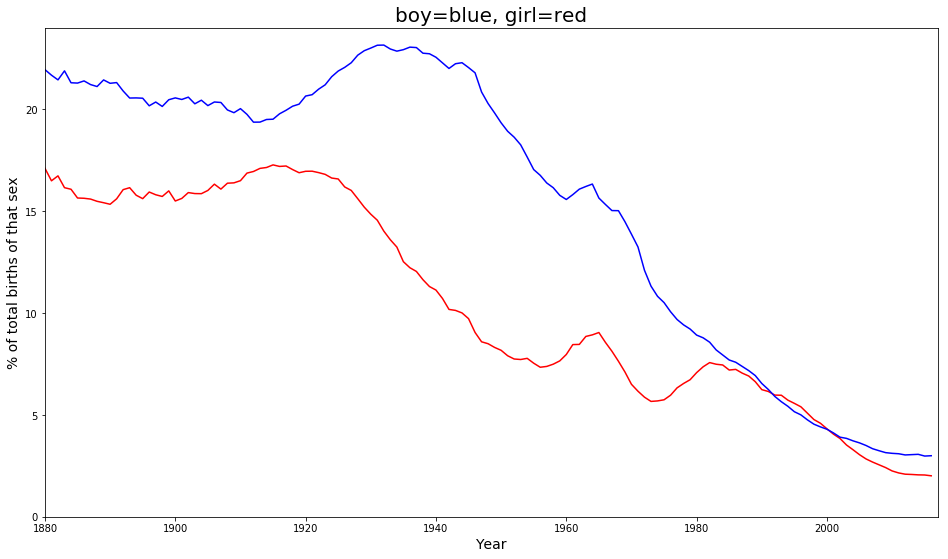

In [10]:
%run Rajeev_download_process_files.py

# reduce names dataframe to those matching list
# print '--------------------\nDataframe names filtered to those that match list'
# print "%d records to begin." % (len(names))
names_listed = names[((names.name.isin(final_m) & (names.sex == 'M')) |
                      (names.name.isin(final_f) & (names.sex == 'F')) )].copy()
names_listed.sort_values('pct_max', ascending=False, inplace=True)
# print "%d records remaining." % (len(names_listed))
# listed_in_df = list(names_listed.name)
# print names_listed.head(10)
# listed_m = list(names[(names.sex == 'M') & (names.name.isin(final_m))]['name'])
# listed_f = list(names[(names.sex == 'F') & (names.name.isin(final_f))]['name'])

#reduce yob dataframe to those matching list
print('--------------------\nDataframe yob filtered to those that match list (count only)')
print("%d records to begin." % (len(yob)))
yob_listed_m = yob[(yob.name.isin(final_m)) & (yob.sex == 'M')].copy()
yob_listed_m.sort_values(['year', 'sex', 'name'], ascending=False, inplace=True)
yob_listed_f = yob[(yob.name.isin(final_f)) & (yob.sex == 'F')].copy()
yob_listed_f.sort_values(['year', 'sex', 'name'], ascending=False, inplace=True)
print("%d records remaining." % (len(yob_listed)))

# m and f totals
yob_listed_f_agg = pd.DataFrame(yob_listed_f.groupby('year').sum())[['births', 'pct']]
yob_listed_m_agg = pd.DataFrame(yob_listed_m.groupby('year').sum())[['births', 'pct']]
print('--------------------\nHead of total matching list per year, female')
print(yob_listed_f_agg.head())

# print chart of m and f totals
print('\n')

# function to determine a nice y-axis limit a little above the maximum value
# rounds maximum y up to second-most-significant digit
def determine_y_limit(x):                      
    significance = int(math.floor((math.log10(x))))
    val = math.floor(x / (10 ** (significance - 1))) + 1
    val = val * (10 ** (significance - 1))
    return val

#data
xf = list(yob_listed_f_agg.index)
xm = list(yob_listed_m_agg.index)

plt.figure(figsize=(16,9))
plt.plot(xf, list(yob_listed_f_agg.pct), color="red")
plt.plot(xm, list(yob_listed_m_agg.pct), color="blue")

plt.ylim(0, determine_y_limit(max(list(yob_listed_f_agg.pct)
                                  +list(yob_listed_m_agg.pct))))
plt.xlim(1880, 2017)

plt.title('boy=blue, girl=red', fontsize = 20)
plt.xlabel("Year", fontsize = 14)
plt.ylabel("% of total births of that sex", fontsize = 14)

plt.show()

In [14]:
# all names_listed, so we can see which ones to aggregate
# cutoff of 10 already done

print(names_listed[names_listed.sex == 'M'].head(50))
print('')
print(names_listed[names_listed.sex == 'F'].head(50))

           name sex  year_count  year_min  year_max     pct_sum   pct_max
66529      John   M         137      1880      2016  560.205488  8.738268
66624    Robert   M         137      1880      2016  399.245833  5.821043
66456   Charles   M         137      1880      2016  266.892668  4.840213
66776   Richard   M         137      1880      2016  190.069663  3.624920
66741     Scott   M         137      1880      2016   42.881843  1.747625
66518    Willie   M         137      1880      2016   60.765320  1.491646
66565    Gerald   M         137      1880      2016   33.913051  0.908144
66422       Roy   M         137      1880      2016   51.758053  0.885976
66579     Ralph   M         137      1880      2016   49.215852  0.805214
66367  Benjamin   M         137      1880      2016   52.787020  0.801269
66684     Roger   M         137      1880      2016   29.562580  0.785572
66795      Carl   M         137      1880      2016   55.560453  0.779285
66747   Charlie   M         137      1

C:\Users\Shreya\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


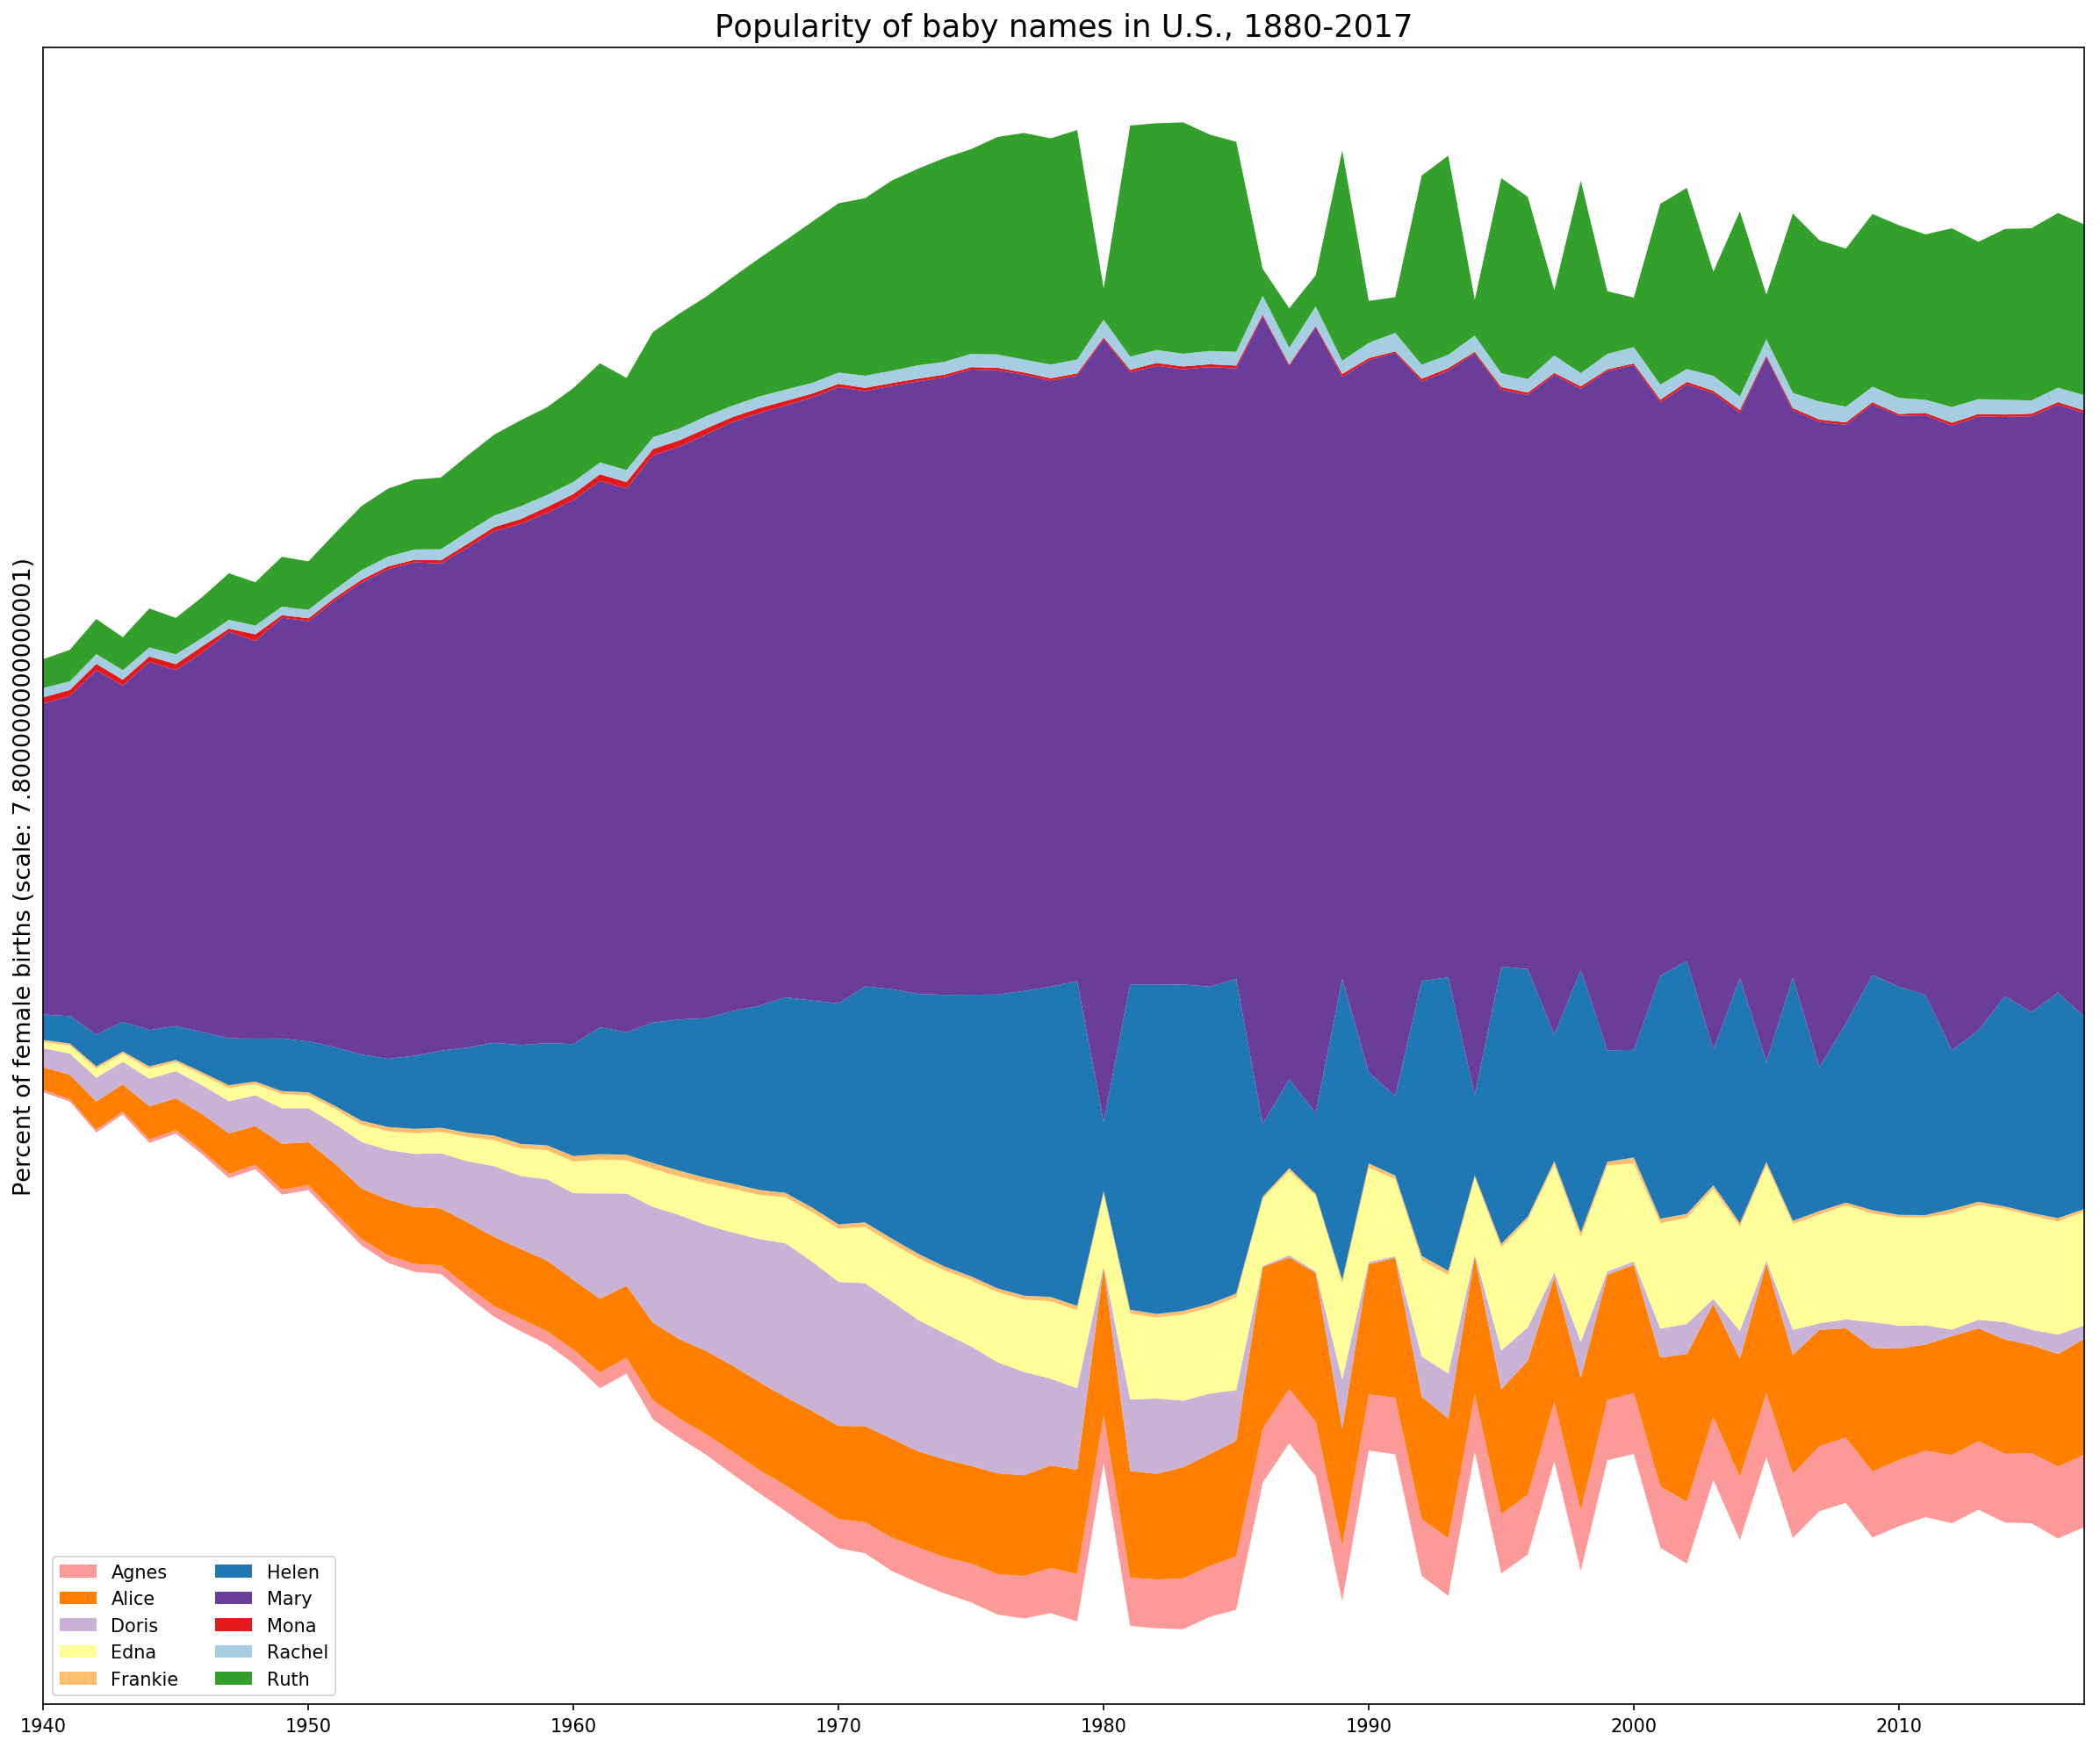

In [26]:
names = final_f[:10]
sexes = ['F'] # can be length 1 or same length as names

yearstart=1880 # for data, not graph
yearend=2017

xmin = 1940

start = time.time()
df_chart = yob.copy()
if len(sexes) == 1:
    sexes = sexes * len(names)
    
df_chart = df_chart[df_chart['name'].isin(names)]   

df_chart['temp'] = 0
for row in range(len(df_chart)):
    for pos in range(len(names)):
        if df_chart.name.iloc[row] == names[pos] and df_chart.sex.iloc[row] == sexes[pos]:
            df_chart.temp.iloc[row] = 1
df_chart = df_chart[df_chart.temp == 1]


#To keep more than one data set for charts in memory, change name of chart_1

chart_1 = pd.DataFrame(pd.pivot_table(df_chart, values='pct', index = 'year', columns=['name', 'sex']))

col = chart_1.columns[0]

for yr in range(yearstart, yearend+1): #inserts missing years
    if yr not in chart_1.index:
        #chart_1[col][yr] = 0.0
        chart_1 = chart_1.append(pd.DataFrame(index=[yr], columns=[col], data=[0.0]))

chart_1 = chart_1.fillna(0)

chart_1.sort_values(by=[col], inplace=True, ascending=True)

#a single function to make the four different kinds of charts

def make_chart(df=chart_1, form='line', title='', colors= [], smoothing=0, \
               groupedlist = [], baseline='sym', png_name=''):
    
    dataframe = df.copy()
    
    startyear = min(list(dataframe.index))
    endyear = max(list(dataframe.index))
    yearstr = '%d-%d' % (startyear, endyear)
    
    legend_size = 0.01
    
    has_male = False
    has_female = False
    has_both = False
    max_y = 0
    for name, sex in dataframe.columns:
        max_y = max(max_y, dataframe[(name, sex)].max())
        final_name = name
        if sex == 'M': has_male = True
        if sex == 'F': has_female = True
        if smoothing > 0:
            newvalues = []
            for row in range(len(dataframe)):
                start = max(0, row - smoothing)
                end = min(len(dataframe) - 1, row + smoothing)
                newvalues.append(dataframe[(name, sex)].iloc[start:end].mean())
            for row in range(len(dataframe)):
                dataframe[(name, sex)].iloc[row] = newvalues[row]
    if has_male and has_female:
        y_text = "% of births of indicated sex"
        has_both = True
    elif has_male:
        y_text = "Percent of male births"
    else:
        y_text = "Percent of female births"
    
    num_series = len(dataframe.columns)
    
    if colors == []:
       colors = ["#1f78b4","#ae4ec9","#33a02c","#fb9a99","#e31a1c","#a6cee3",
                 "#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#ffff99","#b15928"]
        #colors = ['#ff0000', '#b00000', '#870000', '#550000', '#e4e400', '#baba00', '#878700', '#545400', '#00ff00', '#00b000', '#008700', '#005500', '#00ffff', '#00b0b0', '#008787', '#005555', '#b0b0ff', '#8484ff', '#4949ff', '#0000ff', '#ff00ff', '#b000b0', '#870087', '#550055', '#e4e4e4', '#bababa', '#878787', '#545454']
    from random import shuffle
    shuffle(colors)
    num_colors = len(colors)
    
    if num_series > num_colors:
        print("Warning: colors will be repeated.")
    
    if title == '':
        if num_series == 1:
            title = "Popularity of baby name %s in U.S., %s" % (final_name, yearstr)
        else:
            title = "Popularity of baby names in U.S., %s" % (yearstr)
    
    x_values = range(startyear, endyear + 1)
    y_zeroes = [0] * (endyear - startyear)
    
    if form == 'line':
        fig, ax = plt.subplots(num=None, figsize=(16, 9), dpi=300, facecolor='w', edgecolor='w')
        counter = 0
        for name, sex in dataframe.columns:
            color = colors[counter % num_colors]
            counter += 1
            if has_both:
                label = "%s (%s)" % (name, sex)
            else:
                label = name
            ax.plot(x_values, dataframe[(name, sex)], label=label, color=color, linewidth = 3)
        ax.set_ylim(0,determine_y_limit(max_y)) 
        ax.set_xlim(xmin, endyear)
        ax.set_ylabel(y_text, size = 13)
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * legend_size,
                 box.width, box.height * (1 - legend_size)])
        legend_cols = min(5, num_series)
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=legend_cols)

    if form == 'subplots_auto':
        counter = 0
        fig, axes = plt.subplots(num_series, 1, figsize=(12, 3.5*num_series))
        print('Maximum alpha: %d percent' % (determine_y_limit(max_y)))
        for name, sex in dataframe.columns:
            if sex=='M':
                sex_label = 'male'
            else:
                sex_label = 'female'
            label = "Percent of %s births for %s" % (sex_label, name)
            current_ymax = dataframe[(name, sex)].max()
            tint = 1.0 * current_ymax / determine_y_limit(max_y)
            axes[counter].plot(x_values, dataframe[(name, sex)], color='k')
            axes[counter].set_ylim(0,determine_y_limit(current_ymax))
            axes[counter].set_xlim(xmin, endyear)
            axes[counter].fill_between(x_values, dataframe[(name, sex)], color=colors[0], alpha=tint, interpolate=True)

            axes[counter].set_ylabel(label, size=11)
            plt.subplots_adjust(hspace=0.1)
            counter += 1
            
    if form == 'subplots_same':
        counter = 0
        fig, axes = plt.subplots(num_series, 1, figsize=(12, 3.5*num_series))
        print('Maximum y axis: %d percent' % (determine_y_limit(max_y)))
        for name, sex in dataframe.columns:
            if sex=='M':
                sex_label = 'male'
            else:
                sex_label = 'female'
            label = "Percent of %s births for %s" % (sex_label, name)
            axes[counter].plot(x_values, dataframe[(name, sex)], color='k')
            axes[counter].set_ylim(0,determine_y_limit(max_y))
            axes[counter].set_xlim(xmin, endyear)
            axes[counter].fill_between(x_values, dataframe[(name, sex)], color=colors[1], alpha=1, interpolate=True)
            axes[counter].set_ylabel(label, size=11)
            plt.subplots_adjust(hspace=0.1)
            counter += 1
        
    if form == 'stream':
        plt.figure(num=None, figsize=(20,16.67), dpi=150, facecolor='w', edgecolor='k')
        plt.title(title, size=17)        
        plt.xlim(xmin, endyear)
        
        if has_both:
            yaxtext = 'Percent of births of indicated sex (scale: '
        elif has_male:
            yaxtext = 'Percent of male births (scale: '
        else:
            yaxtext = 'Percent of female births (scale: '
        
        scale = str(determine_y_limit(max_y)) + ')'
        yaxtext += scale
        plt.ylabel(yaxtext, size=13)
        polys = plt.stackplot(x_values, *[dataframe[(name, sex)] for name, sex in dataframe.columns], 
                                 colors=colors, baseline=baseline)
        legendProxies = []
        for poly in polys:
            legendProxies.append(plt.Rectangle((0, 0), 1, 1, fc=poly.get_facecolor()[0]))
        namelist = []
        for name, sex in dataframe.columns:
            if has_both:
                namelist.append('%s (%s)' % (name, sex))
            else:
                namelist.append(name)
        plt.legend(legendProxies, namelist, loc=3, ncol=2)
        
        plt.tick_params(\
            axis='y',          
            which='both',      #  major and minor ticks 
            left='off',      
            right='off',       
            labelleft='off')
        
    plt.show()   
    if png_name != '':
        filename = save_path + "/" + png_name + ".png"
        plt.savefig(filename)
    plt.close()
    
#stream graph

make_chart(df=chart_1,
           form='stream', # line , subplots_auto , subplots_same , stream
           title='',
           colors= [],
           smoothing=0,
           baseline='sym',  # zero ,  sym ,  wiggle ,  weighted_wiggle
           png_name = '',  # if '', will not be saved
           )

C:\Users\Shreya\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


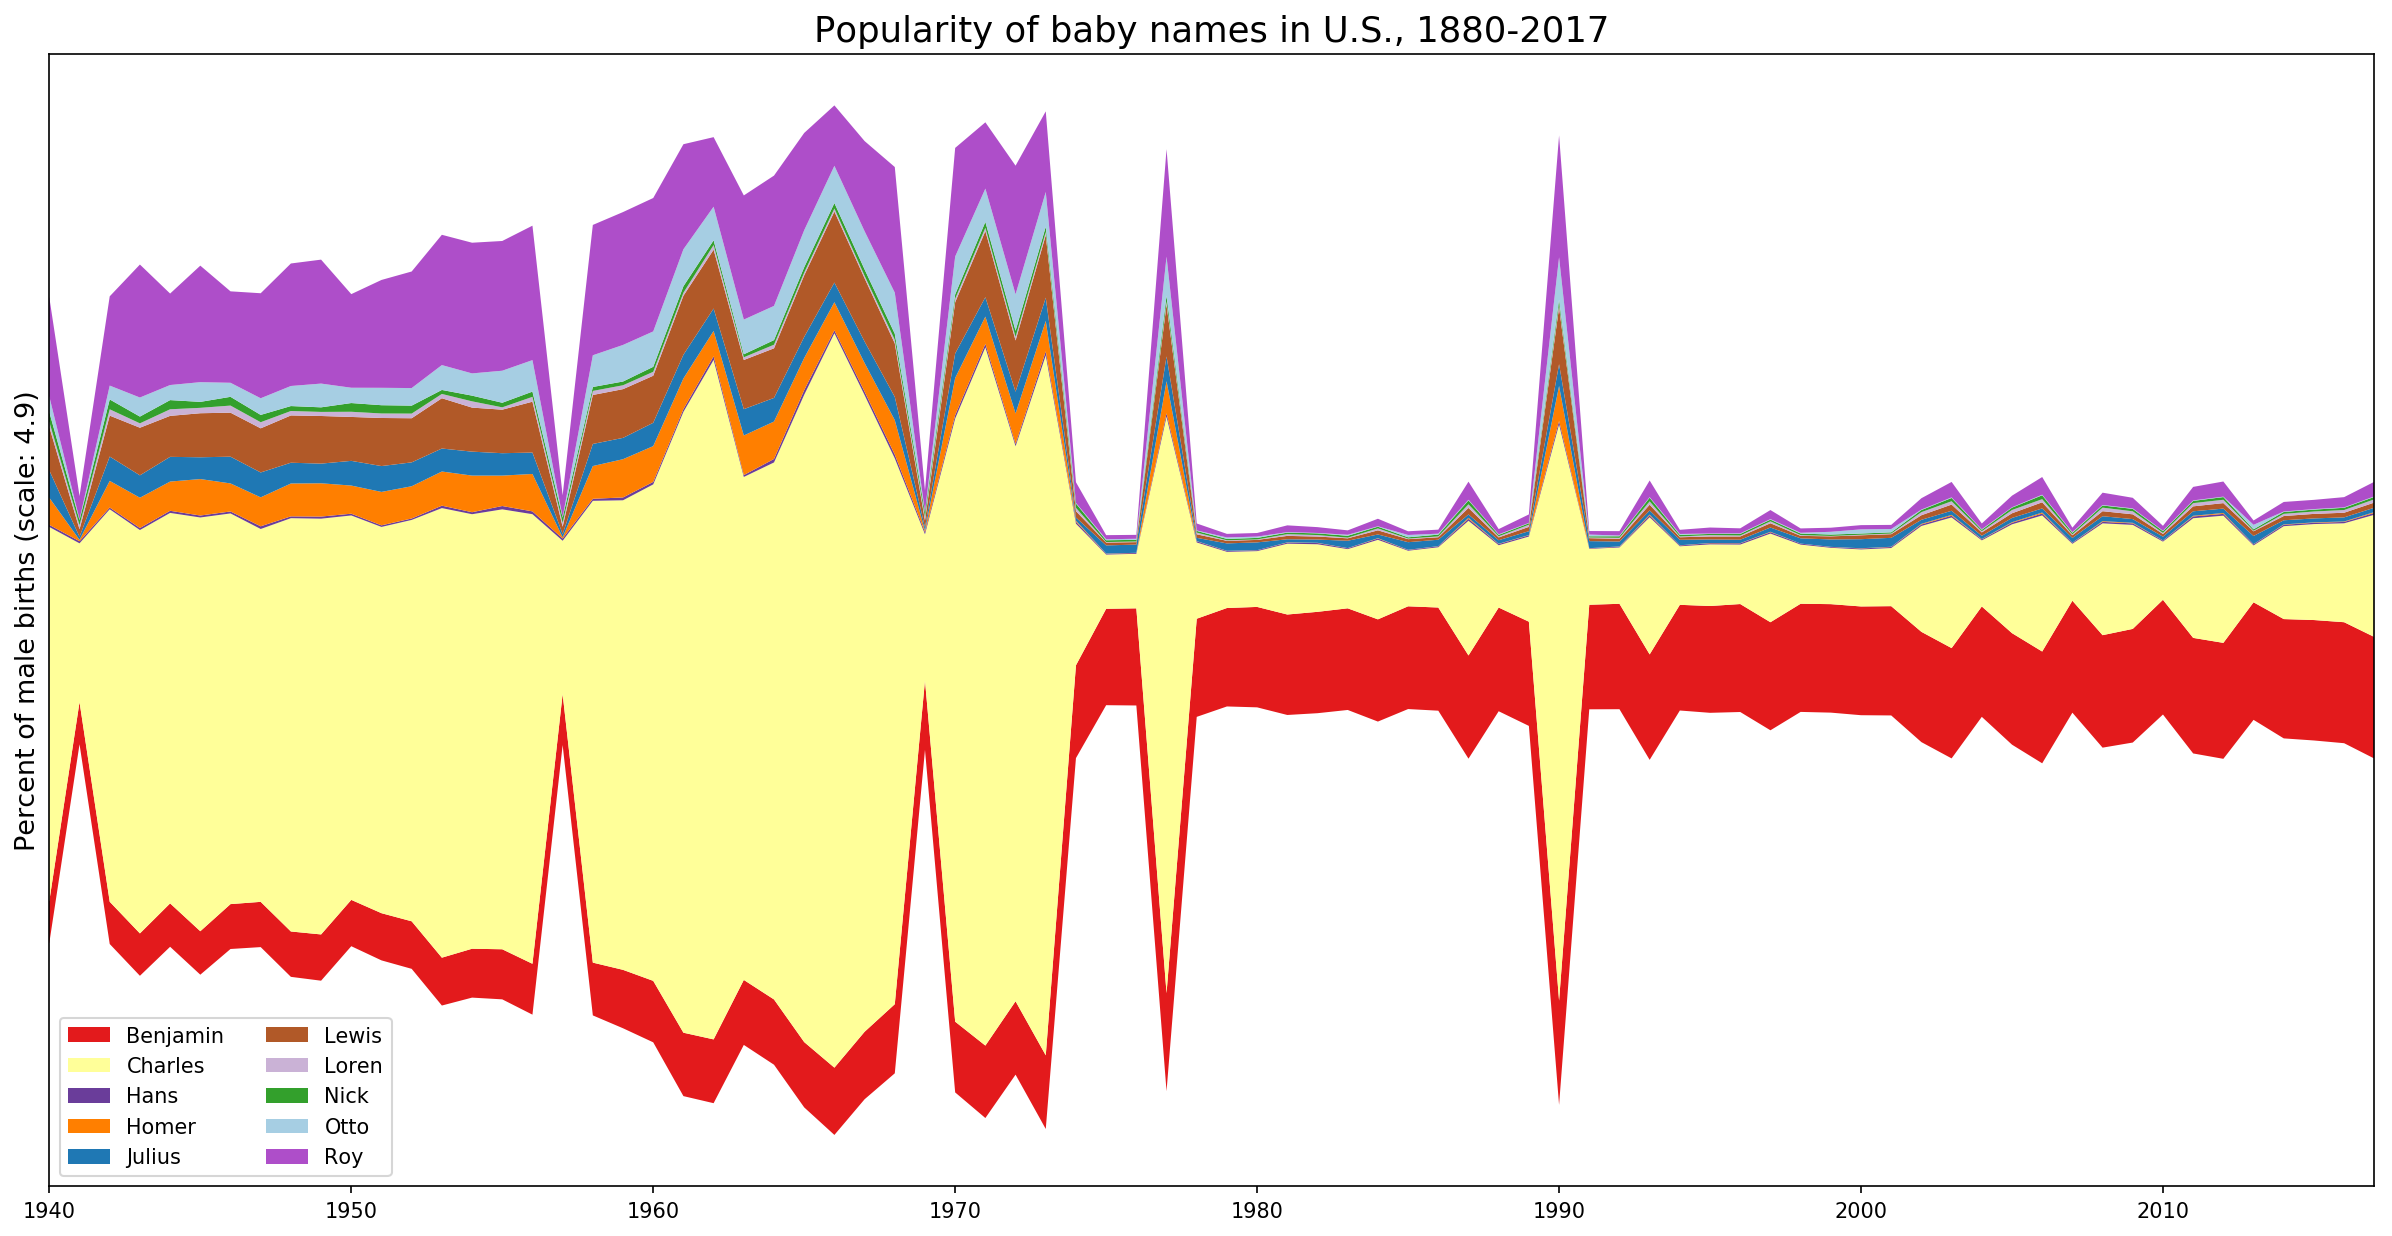

In [29]:
names = final_m[:10]
sexes = ['M'] # can be length 1 or same length as names

yearstart=1880 # for data, not graph
yearend=2017

xmin = 1940

start = time.time()
df_chart = yob.copy()
if len(sexes) == 1:
    sexes = sexes * len(names)
    
df_chart = df_chart[df_chart['name'].isin(names)]   

df_chart['temp'] = 0
for row in range(len(df_chart)):
    for pos in range(len(names)):
        if df_chart.name.iloc[row] == names[pos] and df_chart.sex.iloc[row] == sexes[pos]:
            df_chart.temp.iloc[row] = 1
df_chart = df_chart[df_chart.temp == 1]


#To keep more than one data set for charts in memory, change name of chart_1

chart_1 = pd.DataFrame(pd.pivot_table(df_chart, values='pct', index = 'year', columns=['name', 'sex']))

col = chart_1.columns[0]

for yr in range(yearstart, yearend+1): #inserts missing years
    if yr not in chart_1.index:
        #chart_1[col][yr] = 0.0
        chart_1 = chart_1.append(pd.DataFrame(index=[yr], columns=[col], data=[0.0]))

chart_1 = chart_1.fillna(0)

chart_1.sort_values(by=[col], inplace=True, ascending=True)

#a single function to make the four different kinds of charts

def make_chart(df=chart_1, form='line', title='', colors= [], smoothing=0, \
               groupedlist = [], baseline='sym', png_name=''):
    
    dataframe = df.copy()
    
    startyear = min(list(dataframe.index))
    endyear = max(list(dataframe.index))
    yearstr = '%d-%d' % (startyear, endyear)
    
    legend_size = 0.01
    
    has_male = False
    has_female = False
    has_both = False
    max_y = 0
    for name, sex in dataframe.columns:
        max_y = max(max_y, dataframe[(name, sex)].max())
        final_name = name
        if sex == 'M': has_male = True
        if sex == 'F': has_female = True
        if smoothing > 0:
            newvalues = []
            for row in range(len(dataframe)):
                start = max(0, row - smoothing)
                end = min(len(dataframe) - 1, row + smoothing)
                newvalues.append(dataframe[(name, sex)].iloc[start:end].mean())
            for row in range(len(dataframe)):
                dataframe[(name, sex)].iloc[row] = newvalues[row]
    if has_male and has_female:
        y_text = "% of births of indicated sex"
        has_both = True
    elif has_male:
        y_text = "Percent of male births"
    else:
        y_text = "Percent of female births"
    
    num_series = len(dataframe.columns)
    
    if colors == []:
       colors = ["#1f78b4","#ae4ec9","#33a02c","#fb9a99","#e31a1c","#a6cee3",
                 "#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#ffff99","#b15928"]
        #colors = ['#ff0000', '#b00000', '#870000', '#550000', '#e4e400', '#baba00', '#878700', '#545400', '#00ff00', '#00b000', '#008700', '#005500', '#00ffff', '#00b0b0', '#008787', '#005555', '#b0b0ff', '#8484ff', '#4949ff', '#0000ff', '#ff00ff', '#b000b0', '#870087', '#550055', '#e4e4e4', '#bababa', '#878787', '#545454']
    from random import shuffle
    shuffle(colors)
    num_colors = len(colors)
    
    if num_series > num_colors:
        print("Warning: colors will be repeated.")
    
    if title == '':
        if num_series == 1:
            title = "Popularity of baby name %s in U.S., %s" % (final_name, yearstr)
        else:
            title = "Popularity of baby names in U.S., %s" % (yearstr)
    
    x_values = range(startyear, endyear + 1)
    y_zeroes = [0] * (endyear - startyear)
    
    if form == 'line':
        fig, ax = plt.subplots(num=None, figsize=(16, 9), dpi=300, facecolor='w', edgecolor='w')
        counter = 0
        for name, sex in dataframe.columns:
            color = colors[counter % num_colors]
            counter += 1
            if has_both:
                label = "%s (%s)" % (name, sex)
            else:
                label = name
            ax.plot(x_values, dataframe[(name, sex)], label=label, color=color, linewidth = 3)
        ax.set_ylim(0,determine_y_limit(max_y)) 
        ax.set_xlim(xmin, endyear)
        ax.set_ylabel(y_text, size = 13)
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * legend_size,
                 box.width, box.height * (1 - legend_size)])
        legend_cols = min(5, num_series)
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=legend_cols)

    if form == 'subplots_auto':
        counter = 0
        fig, axes = plt.subplots(num_series, 1, figsize=(12, 3.5*num_series))
        print('Maximum alpha: %d percent' % (determine_y_limit(max_y)))
        for name, sex in dataframe.columns:
            if sex=='M':
                sex_label = 'male'
            else:
                sex_label = 'female'
            label = "Percent of %s births for %s" % (sex_label, name)
            current_ymax = dataframe[(name, sex)].max()
            tint = 1.0 * current_ymax / determine_y_limit(max_y)
            axes[counter].plot(x_values, dataframe[(name, sex)], color='k')
            axes[counter].set_ylim(0,determine_y_limit(current_ymax))
            axes[counter].set_xlim(xmin, endyear)
            axes[counter].fill_between(x_values, dataframe[(name, sex)], color=colors[0], alpha=tint, interpolate=True)

            axes[counter].set_ylabel(label, size=11)
            plt.subplots_adjust(hspace=0.1)
            counter += 1
            
    if form == 'subplots_same':
        counter = 0
        fig, axes = plt.subplots(num_series, 1, figsize=(12, 3.5*num_series))
        print('Maximum y axis: %d percent' % (determine_y_limit(max_y)))
        for name, sex in dataframe.columns:
            if sex=='M':
                sex_label = 'male'
            else:
                sex_label = 'female'
            label = "Percent of %s births for %s" % (sex_label, name)
            axes[counter].plot(x_values, dataframe[(name, sex)], color='k')
            axes[counter].set_ylim(0,determine_y_limit(max_y))
            axes[counter].set_xlim(xmin, endyear)
            axes[counter].fill_between(x_values, dataframe[(name, sex)], color=colors[1], alpha=1, interpolate=True)
            axes[counter].set_ylabel(label, size=11)
            plt.subplots_adjust(hspace=0.1)
            counter += 1
        
    if form == 'stream':
        plt.figure(num=None, figsize=(20,10), dpi=150, facecolor='w', edgecolor='k')
        plt.title(title, size=17)        
        plt.xlim(xmin, endyear)
        
        if has_both:
            yaxtext = 'Percent of births of indicated sex (scale: '
        elif has_male:
            yaxtext = 'Percent of male births (scale: '
        else:
            yaxtext = 'Percent of female births (scale: '
        
        scale = str(determine_y_limit(max_y)) + ')'
        yaxtext += scale
        plt.ylabel(yaxtext, size=13)
        polys = plt.stackplot(x_values, *[dataframe[(name, sex)] for name, sex in dataframe.columns], 
                                 colors=colors, baseline=baseline)
        legendProxies = []
        for poly in polys:
            legendProxies.append(plt.Rectangle((0, 0), 1, 1, fc=poly.get_facecolor()[0]))
        namelist = []
        for name, sex in dataframe.columns:
            if has_both:
                namelist.append('%s (%s)' % (name, sex))
            else:
                namelist.append(name)
        plt.legend(legendProxies, namelist, loc=3, ncol=2)
        
        plt.tick_params(\
            axis='y',          
            which='both',      #  major and minor ticks 
            left='off',      
            right='off',       
            labelleft='off')
        
    plt.show()   
    if png_name != '':
        filename = save_path + "/" + png_name + ".png"
        plt.savefig(filename)
    plt.close()
    
#stream graph

make_chart(df=chart_1,
           form='stream', # line , subplots_auto , subplots_same , stream
           title='',
           colors= [],
           smoothing=0,
           baseline='sym',  # zero ,  sym ,  wiggle ,  weighted_wiggle
           png_name = '',  # if '', will not be saved
           )